# Recurrent Neural Networks (RNNs)

- Recurrent Neural Networks (RNNs) are a specific type of Artificial Neural Network (ANN) designed to handle sequential data.

- Unlike traditional ANNs, which process each data point independently, RNNs can account for the order of information.

- This makes them particularly useful for tasks that involve understanding or predicting sequences, like:

- **Language Translation**: RNNs can analyze a sentence in one language and translate it into another while considering the context of each word.

- **Speech Recognition**: They can decipher spoken language by understanding the sequence of sounds and their relationships.Time Series Forecasting: RNNs can analyze trends in data collected over time to predict future values. This can be used for stock market predictions or weather forecasting.

- **Text Generation**: RNNs can be used to generate text, like chatbots that can hold conversations or create realistic dialogue.

## What are Recurrent Neural Networks (RNN)

Recurrent Neural Networks (RNNs) work a bit different from regular neural networks. In neural network the information flows in one direction from input to output. However in RNN information is fed back into the system after each step. Think of it like reading a sentence, when you’re trying to predict the next word you don’t just look at the current word but also need to remember the words that came before to make accurate guess.

**RNNs allow the network to “remember” past information by feeding the output from one step into next step. This helps the network understand the context of what has already happened and make better predictions based on that**. For example when predicting the next word in a sentence the RNN uses the previous words to help decide what word is most likely to come next.

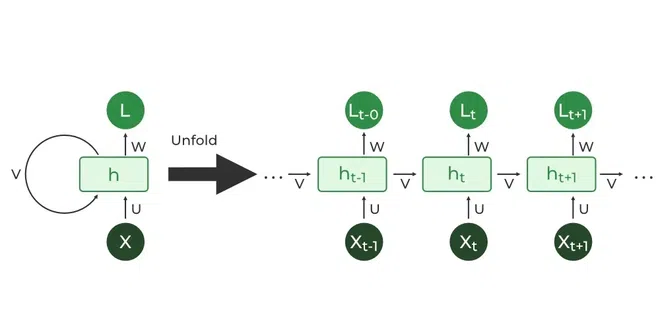

This image showcases the basic architecture of RNN and the **feedback loop mechanism where the output is passed back as input for the next time step**.

## How Recurrent Neural Networks Work

In RNN, the information cycles through the loop, so the output is determined by the current input and previously received inputs.

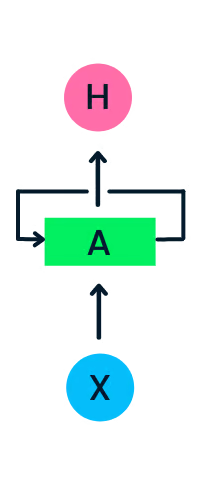

The input layer X processes the initial input and passes it to the middle layer A. The middle layer consists of multiple hidden layers, each with its activation functions, weights, and biases. These parameters are standardized across the hidden layer so that instead of creating multiple hidden layers, it will create one and loop it over.

Instead of using traditional **backpropagation**, recurrent neural networks use **backpropagation through time (BPTT)** algorithms to determine the gradient. In backpropagation, the model adjusts the parameter by calculating errors from the output to the input layer. BPTT sums the error at each time step as RNN shares parameters across each layer.

## Key Components of RNNs

## 1. Recurrent Neurons

The fundamental processing unit in RNN is a **Recurrent Unit**. Recurrent units hold a hidden state that maintains information about previous inputs in a sequence. Recurrent units can “remember” information from prior steps by feeding back their hidden state, allowing them to capture dependencies across time.

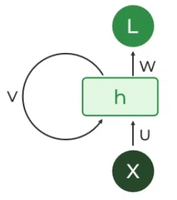

## 2. RNN Unfolding

RNN unfolding or unrolling is the process of expanding the recurrent structure over time steps. During unfolding each step of the sequence is represented as a separate layer in a series illustrating how information flows across each time step.

This unrolling enables backpropagation through time (BPTT) a learning process where errors are propagated across time steps to adjust the network’s weights enhancing the RNN’s ability to learn dependencies within sequential data.

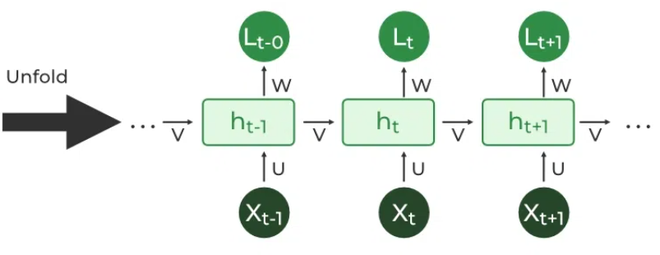

                                     RNN Unfolding

## Recurrent Neural Network Architecture

RNNs share similarities in input and output structures with other deep learning architectures but differ significantly in how information flows from input to output. Unlike traditional deep neural networks, where each dense layer has distinct weight matrices, RNNs use shared weights across time steps, allowing them to remember information over sequences.

In RNNs, the hidden state $H_i$is calculated for every input $X_i$to retain sequential dependencies. The computations follow these core formulas:

### 1. Hidden State Calculation:

$$
h = \sigma(U \cdot X + W \cdot h_{t-1} + B)
$$

Here,  
- $ h $ represents the current hidden state,  
- $ U $ and $ W $ are weight matrices,  
- $ B $ is the bias,  
- $ \sigma $ is the activation function.

## 2. Output Calculation:

$$
Y = O(V \cdot h + C)
$$

The output $ Y $ is calculated by applying $ O $, an activation function, to the weighted hidden state, where:  
- $ V $ represents the weight matrix,  
- $ C $ is the bias.

## 3. Overall Function:

$$
Y = f(X, h, W, U, V, B, C)
$$

This function defines the entire RNN operation, where the state matrix $ S $ holds each element $ s_i $, representing the network’s state at each time step $ i $.


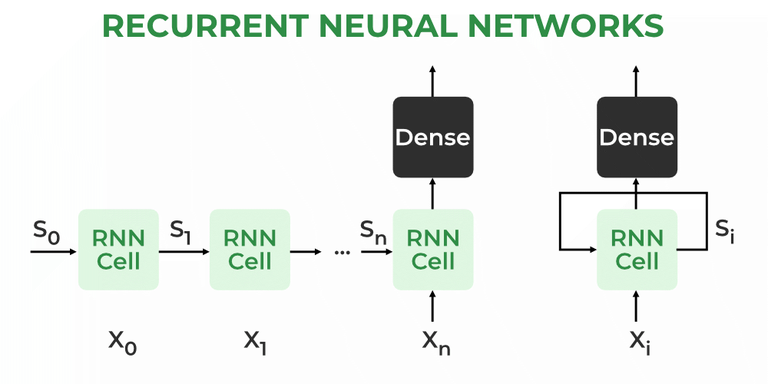

## How does RNN work?

At each time step, RNNs process units with a fixed activation function. These units have an internal hidden state that acts as memory, retaining information from previous time steps. This memory allows the network to store past knowledge and adapt based on new inputs.

## Updating the Hidden State in RNNs

The current hidden state $ h_t $ depends on the previous state $ h_{t-1} $ and the current input $ x_t $, and is calculated using the following relations:

### 1. State Update:

$$
h_t = f(h_{t-1}, x_t)
$$

where:  
- $ h_t $ is the current state,  
- $ h_{t-1} $ is the previous state,  
- $ x_t $ is the input at the current time step.

### 2. Activation Function Application:

$$
h_t = \tanh(W_{hh} \cdot h_{t-1} + W_{xh} \cdot x_t)
$$

Here:  
- $ W_{hh} $ is the weight matrix for the recurrent neuron,  
- $ W_{xh} $ is the weight matrix for the input neuron.

### 3. Output Calculation:

$$
y_t = W_{hy} \cdot h_t
$$

where:  
- $ y_t $ is the output,  
- $ W_{hy} $ is the weight at the output layer.

These parameters are updated using backpropagation. However, since RNNs work on sequential data, we use an updated backpropagation method known as **Backpropagation Through Time (BPTT)**.

## Backpropagation Through Time (BPTT) in RNNs

Since RNNs process sequential data, **Backpropagation Through Time (BPTT)** is used to update the network’s parameters. The loss function $ L(\theta) $ depends on the final hidden state $ h_3 $, and each hidden state relies on preceding ones, forming a sequential dependency chain:

$$
h_3 \text{ depends on } h_2, \quad h_2 \text{ depends on } h_1, \quad \dots, \quad h_1 \text{ depends on } h_0
$$

This sequential dependency makes BPTT computationally intensive but crucial for training RNNs effectively.


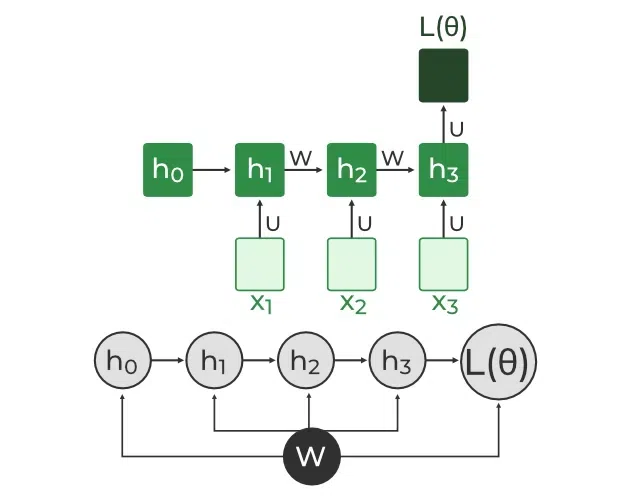

In BPTT, gradients are backpropagated through each time step. This is essential for updating network parameters based on temporal dependencies.

### 1. Simplified Gradient Calculation:

$$
\frac{\partial L(\theta)}{\partial W} = \frac{\partial L(\theta)}{\partial h_3} \cdot \frac{\partial h_3}{\partial W}
$$

### 2. Handling Dependencies in Layers:

Each hidden state is updated based on its dependencies:

$$
h_3 = \sigma(W \cdot h_2 + b)
$$

The gradient is then calculated for each state, considering dependencies from previous hidden states.

### 3. Gradient Calculation with Explicit and Implicit Parts:

The gradient is broken down into explicit and implicit parts, summing up the indirect paths from each hidden state to the weights:

$$
\frac{\partial h_3}{\partial W} = \frac{\partial h_3}{\partial W} + \frac{\partial h_3}{\partial h_2} \cdot \frac{\partial h_2}{\partial W}
$$

### 4. Final Gradient Expression:

The final derivative of the loss function with respect to the weight matrix \( W \) is computed as:

$$
\frac{\partial L(\theta)}{\partial W} = \frac{\partial L(\theta)}{\partial h_3} \cdot \sum_{k=1}^{3} \frac{\partial h_3}{\partial h_k} \cdot \frac{\partial h_k}{\partial W}
$$

This iterative process is the essence of **Backpropagation Through Time (BPTT)**.


## Types Of Recurrent Neural Networks

Feedforward networks have single input and output, while recurrent neural networks are flexible as the length of inputs and outputs can be changed. This flexibility allows RNNs to generate music, sentiment classification, and machine translation.

There are four types of RNN based on different lengths of inputs and outputs.

- **One-to-one** is a simple neural network. It is commonly used for machine learning problems that have a single input and output.

- **One-to-many** has a single input and multiple outputs. This is used for generating image captions.

- **Many-to-one** takes a sequence of multiple inputs and predicts a single output. It is popular in sentiment classification, where the input is text and the output is a category.

- **Many-to-many** takes multiple inputs and outputs. The most common application is machine translation.

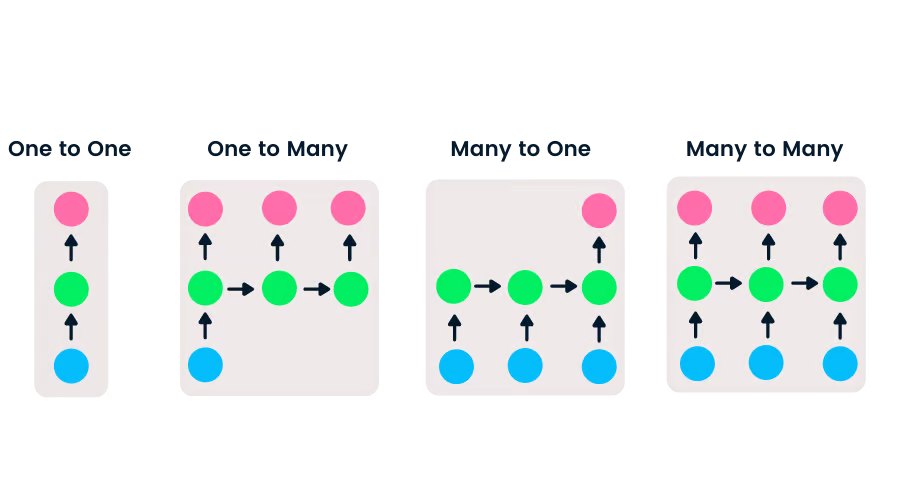

## One to One

- This type of RNN behaves the same as any simple Neural network it is also known as Vanilla Neural Network. In this Neural network, there is only one input and one output.

- This is the simplest type of neural network architecture where there is a single input and a single output. It is used for straightforward classification tasks such as binary classification where no sequential data is involved.

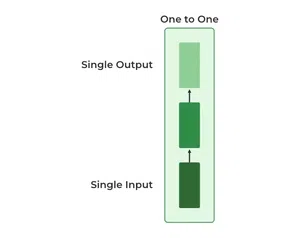

## One To Many

- In this type of RNN, there is one input and many outputs associated with it.
- One of the most used examples of this network is Image captioning where given an image we predict a sentence having Multiple words.
- In a One-to-Many RNN the network processes a single input to produce multiple outputs over time. This is useful in tasks where one input triggers a sequence of predictions (outputs).
- For example in image captioning a single image can be used as input to generate a sequence of words as a caption.

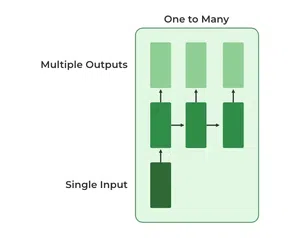

## Many to One

- In this type of network, Many inputs are fed to the network at several states of the network generating only one output.
- This type of network is used in the problems like sentimental analysis.
- Where we give multiple words as input and predict only the sentiment of the sentence as output.
- The Many-to-One RNN receives a sequence of inputs and generates a single output. This type is useful when the overall context of the input sequence is needed to make one prediction.
- In sentiment analysis the model receives a sequence of words (like a sentence) and produces a single output like positive, negative or neutral.

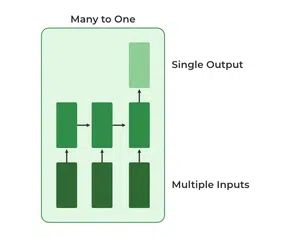

## Many to Many

- In this type of neural network, there are multiple inputs and multiple outputs corresponding to a problem.
- One Example of this Problem will be language translation.
- In language translation, we provide multiple words from one language as input and predict multiple words from the second language as output.

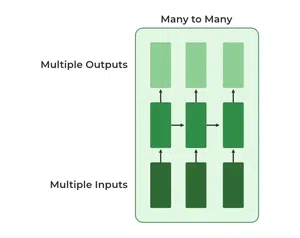

## CNN vs. RNN

The convolutional neural network (CNN) is a feed-forward neural network capable of processing spatial data. It is commonly used for computer vision applications such as image classification. The simple neural networks are good at simple binary classifications, but they can't handle images with pixel dependencies. The CNN model architecture consists of **convolutional** layers, **ReLU** layers, **pooling** layers, and fully connected output layers.

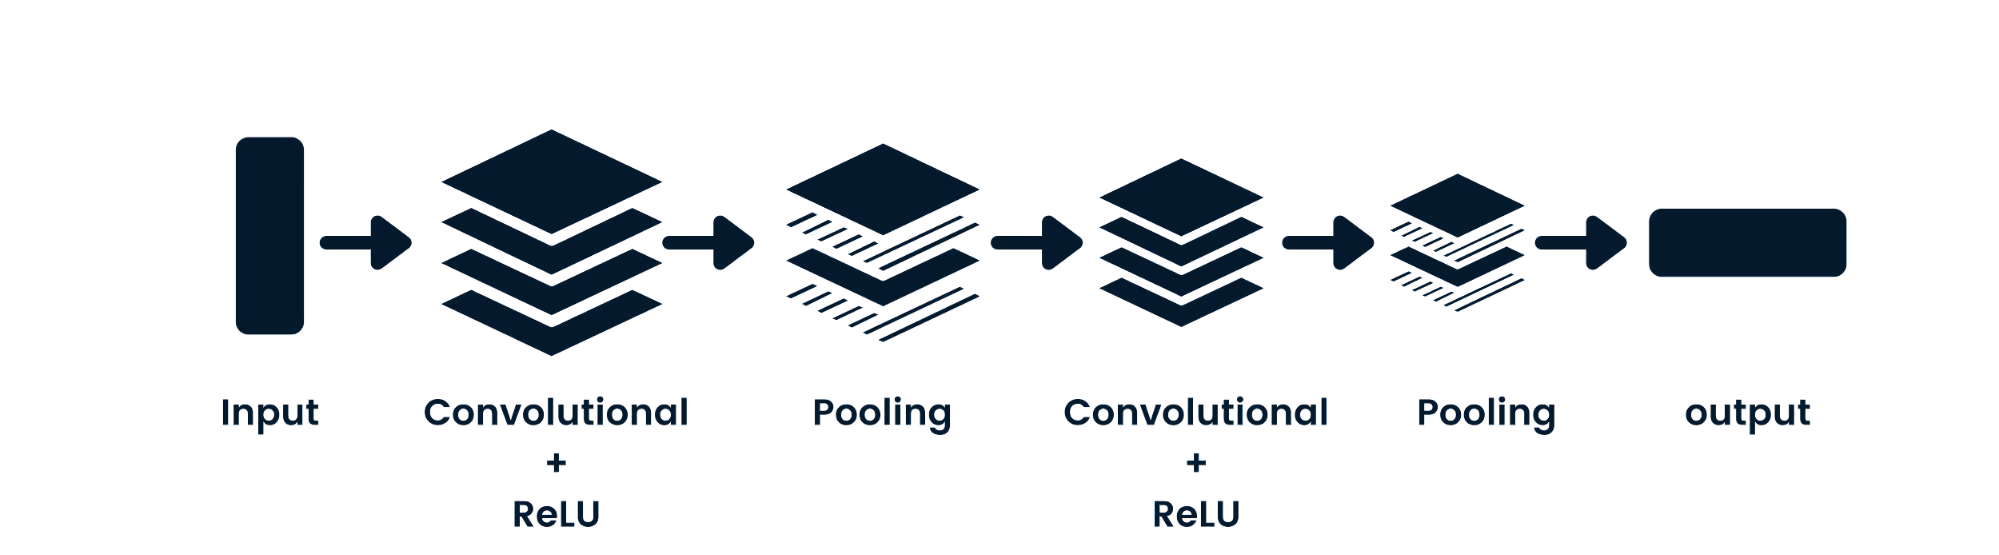

                                        CNN Model Architecture

# **Backpropagation Through Time (BPTT) in RNNs**

Instead of using traditional backpropagation, **Recurrent Neural Networks (RNNs)** use **Backpropagation Through Time (BPTT)** to determine the gradient. 

In standard backpropagation, the model adjusts parameters by calculating errors from the output layer back to the input layer. However, in BPTT, the error is summed at each time step since RNNs share parameters across layers.

## **Gradient Computation in BPTT**
The gradient of the loss function \( L(\theta) \) with respect to weight matrix \( W \) is computed iteratively:

$$
\frac{\partial L(\theta)}{\partial W} = \frac{\partial L(\theta)}{\partial h_T} \cdot \sum_{k=1}^{T} \frac{\partial h_T}{\partial h_k} \cdot \frac{\partial h_k}{\partial W}
$$

where $ T $ represents the total number of time steps.

The process of computing gradients for multiple time steps makes BPTT computationally expensive but essential for training sequential models.

---

# **Applications of RNNs**
- **Machine Translation** – Converts text from one language to another.
- **Text Summarization** – Generates a concise summary of a given text.
- **Chatbots** – Enables human-like conversation in AI-driven chat applications.
- **Speech Recognition** – Converts spoken language into text.
- **Stock Market Prediction** – Analyzes sequential stock data for forecasting.
- **Handwriting Recognition** – Identifies handwritten characters in images.

## **Advantages of RNNs**
- **Understanding Context** – Maintains memory of past inputs, allowing context-aware predictions.
- **Modeling Sequential Data** – Best suited for tasks involving time series, speech, or text.
- **Efficiency** – Can handle variable-length input sequences.

## **Disadvantages of RNNs**
- **Vanishing Gradient Problem** – Gradients become too small, making long-term dependencies hard to learn.
- **Difficult to Train** – High computational requirements and complex training process.
- **Limited Parallelization** – Cannot fully utilize GPUs since computations depend on previous time steps.
